<a href="https://colab.research.google.com/github/20B01A0570/Kannikanti-Gayathri-Machine-Learning-Intern-YBI/blob/main/Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##YBI FOUNDATION 'MACHINE LEARNING INTERN'
**Author**: Kannikanti Gayathri<br>
**Batch**: 1st August<br>
**Project3: Income Prediction on Adult Salary dataset**<br>
Dataset Link:  https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv


#Importing Libraries

In [2]:
import pandas as pd
import numpy as np

#Reading the data from csv file

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv')

In [4]:
data.columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

In [5]:
data.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [6]:
data["Gender"]=data["Gender"].map({"Male":0,"Female":1})

#Checking for Null values

In [7]:
data = data[data["WorkingClass"] != "?"]
data = data[data["Occupation"] != "?"]
data = data[data["NativeCountry"] != "?"]

data.shape

(45222, 10)

In [8]:
# frequency for categorical fields 
category_col =['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'] 
for c in category_col:
    print (c)
    print (data[c].value_counts())

Age
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: Age, Length: 74, dtype: int64
Gender
0    30527
1    14695
Name: Gender, dtype: int64
WorkingClass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: WorkingClass, dtype: int64
Education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: Education, dtype: int64
MaritalStatus
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


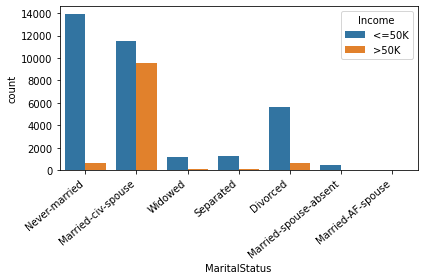

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(data['MaritalStatus'], hue=data['Income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#Converting marital status to 2 categories
It seems better to reduce the number of categories for marital status to better visualize the effect of marital status on income. We need to convert the following into 2 distinct categories namely, "married" and "not married"

In [12]:
data.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [13]:
for col in category_col:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,8,0,2,1,1,6,3,2,38,0
1,21,0,2,11,0,4,0,4,38,0
2,11,0,1,7,0,10,0,4,38,1
3,27,0,2,15,0,6,0,2,38,1
5,17,0,2,0,1,7,1,4,38,0


In [ ]:
from scipy.stats import pointbiserialr, spearmanr
col_names = data.columns
param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "Income":
        if len(data[c].unique()) <= 2:
            corr = spearmanr(data['Income'],data[c])[0]
        else:
            corr = pointbiserialr(data['Income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
MaritalStatus,-0.437678,0.437678
Relationship,-0.253402,0.253402
Age,0.237040,0.237040
Gender,-0.215760,0.215760
Education,0.081196,0.081196
Race,0.070844,0.070844
Occupation,0.049787,0.049787
NativeCountry,0.020103,0.020103
WorkingClass,0.015659,0.015659


#Defining X and y 

In [14]:
X = data[['MaritalStatus','Relationship','Age', 'Gender',  'Education','Occupation']]

In [15]:
y = data['Income']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2486)

#1.Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)

In [25]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7567627331023807

#2. Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

#Predicting and finding accuracy using Random Forest Classifier


In [29]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Random Forest accuracy:",score)

Random Forest accuracy: 0.8064421021596521


#Plotting confusion matrix

In [30]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [31]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     10459
           1       0.57      0.63      0.60      3108

    accuracy                           0.81     13567
   macro avg       0.73      0.74      0.74     13567
weighted avg       0.81      0.81      0.81     13567



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 80.64%


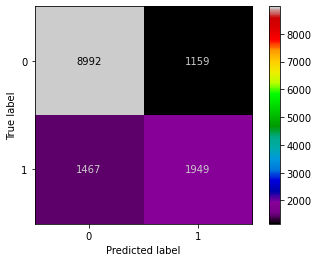

In [32]:
from matplotlib.markers import CARETLEFTBASE
print('Random Forest Classifier')
report(clf)
print(f'Accuracy: {round(score*100,2)}%')


**Random Forest Classifier is marginally better than Logistic Regression in terms of accuracy, it is the selected model.**
 